# Monitor

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

import sys
sys.path.append( './helper/' )
from XperimentPlotter import XperimentPlotter
from Colormap import Colormap

2024-01-23 16:42:21.128909: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 16:42:21.162754: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 16:42:21.162785: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-23 16:42:21.163830: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-23 16:42:21.169414: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 16:42:21.169856: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
plt.rcParams['text.usetex'] = True
fontsize = 12
baseFigurePath = './tmp/figures'

## Figure 4.17

In [3]:
path = '../data/015tempDependency1'
data = []

startingdate_str = '2023-08-09 12:41:59'
startingdate = datetime.strptime(startingdate_str, '%Y-%m-%d %H:%M:%S')
duration = 144 #sec
for i in range(1,51):
    data.append(XperimentPlotter.ReadData(f'{path}/Test{i:02}/', f'015 Test{i} (sc, ascending)', [(startingdate + timedelta(seconds=duration*i)).strftime('%Y-%m-%d %H:%M'), (startingdate + timedelta(seconds=duration*(i+1))).strftime('%Y-%m-%d %H:%M')]))

path_temps = f'{path}/Test50'
mergedDataTemps = []
for d in data:
    mergedDataTemps.append(XperimentPlotter.mergeTempsInData(d, path_temps))

/home/jonas/Documents/GithubRepo/code/./helper/XperimentPlotter.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '27.375' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  d.dataframe.loc[i, 'temps'] = row.temps
/home/jonas/Documents/GithubRepo/code/./helper/XperimentPlotter.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '30.3125' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  d.dataframe.loc[i, 'temps'] = row.temps
/home/jonas/Documents/GithubRepo/code/./helper/XperimentPlotter.py:171: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '32.75' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  d.dataframe.fillna(lasttemp, inp

/tmp/ipykernel_141968/2024048825.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


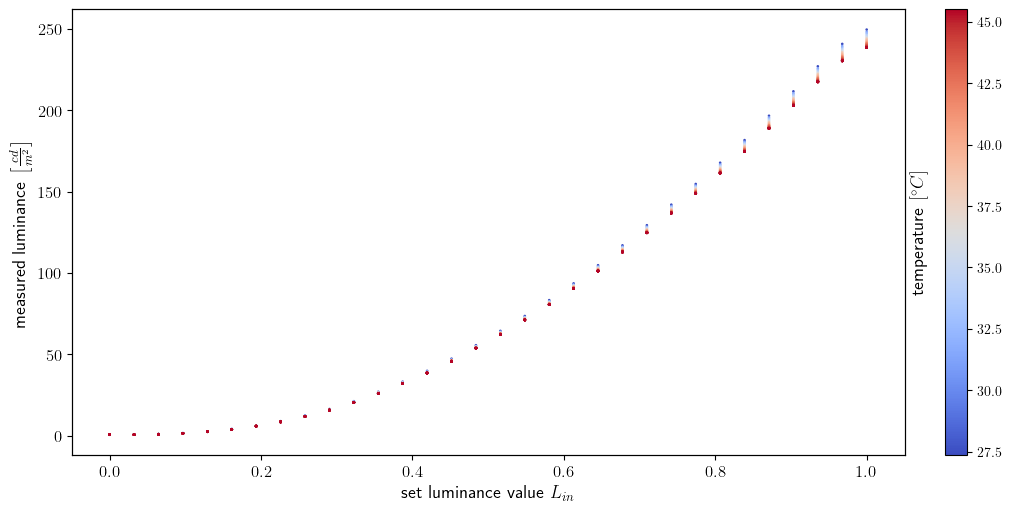

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5), layout='constrained')
fontsize = 13

list_dataframes = []
for d in mergedDataTemps:
    list_dataframes.append(d.dataframe)

concat = pd.concat(list_dataframes)

pcm = axes.scatter(concat['levels'], concat['mean'], marker='.', s=3, c=concat['temps'], cmap='coolwarm')

axes.set_xlabel('set luminance value $L_{in}$', fontsize=fontsize)
axes.set_ylabel(r'measured luminance $\left[\frac{cd}{m^2}\right]$', fontsize=fontsize)
for tick in plt.gca().get_xticklabels():
    tick.set_fontsize(fontsize-1)
for tick in plt.gca().get_yticklabels():
    tick.set_fontsize(fontsize-1)

# set label for colorbar
ax2 = axes.twinx()
ax2.set_yticks([])
ax2.set_ylabel(r'temperature $\left[^{\circ}C\right]$', fontsize=fontsize)

fig.colorbar(pcm, pad=0.02)

figurePath = f'{baseFigurePath}/03_04Monitor/profileVPIXXBreiter.png'
fig.show()
fig.savefig(figurePath, dpi=300)

## Figure 4.18

max Temp: 45.5
min Temp: 30.3125
49

max diff [cd/m^2]: 0.0
max diff [cd/m^2]: 0.9816110000002425
max diff [cd/m^2]: 4.106846999999846
max diff [cd/m^2]: 7.420298000000173
max diff [cd/m^2]: 9.335544000000425
max diff [cd/m^2]: 9.643106999999958
cd where max: 248.26251900000017


/tmp/ipykernel_141968/3008463633.py:56: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


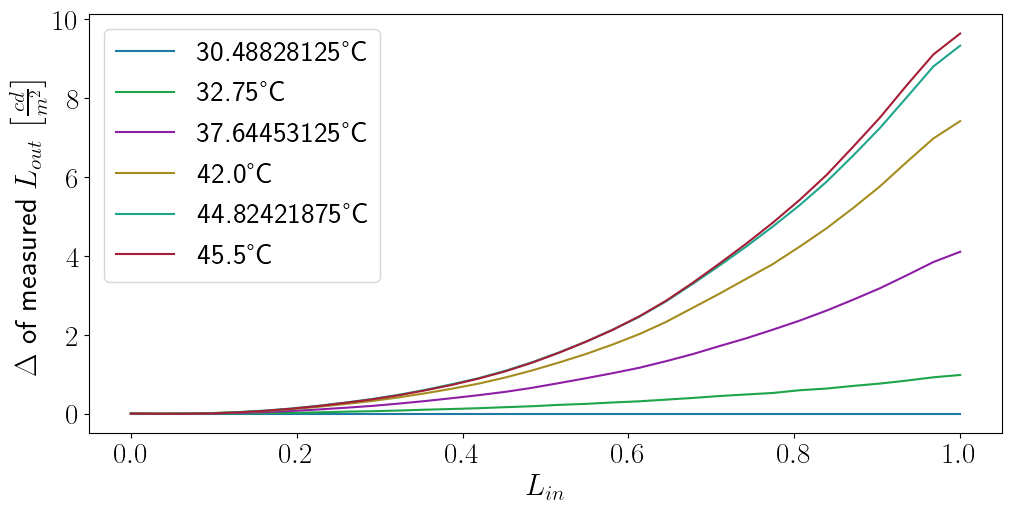

In [5]:
maxTemp = 0
minTemp = 9999999

for d in mergedDataTemps[1:]:
    dmax = d.dataframe['temps'].max()
    dmin = d.dataframe['temps'].min()
    if dmax >= maxTemp:
        maxTemp = dmax
    if dmin <= minTemp:
        minTemp = dmin
print(f'max Temp: {maxTemp}')
print(f'min Temp: {minTemp}')

print(len(mergedDataTemps[1:]))
print()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5), layout='constrained')
fontsize=22
df_cold = mergedDataTemps[1].dataframe

df_warm = mergedDataTemps[1].dataframe
axes.plot(df_cold['levels'], df_cold['mean']-df_warm['mean'],color=Colormap.map[1], label=f'{df_warm["temps"].mean()}°C')
print(f'max diff [cd/m^2]: {(df_cold["mean"]-df_warm["mean"]).max()}')

df_warm = mergedDataTemps[2].dataframe
axes.plot(df_cold['levels'], df_cold['mean']-df_warm['mean'],color=Colormap.map[2], label=f'{df_warm["temps"].mean()}°C')
print(f'max diff [cd/m^2]: {(df_cold["mean"]-df_warm["mean"]).max()}')

df_warm = mergedDataTemps[6].dataframe
axes.plot(df_cold['levels'], df_cold['mean']-df_warm['mean'],color=Colormap.map[3], label=f'{df_warm["temps"].mean()}°C')
print(f'max diff [cd/m^2]: {(df_cold["mean"]-df_warm["mean"]).max()}')

df_warm = mergedDataTemps[13].dataframe
axes.plot(df_cold['levels'], df_cold['mean']-df_warm['mean'],color=Colormap.map[4], label=f'{df_warm["temps"].mean()}°C')
print(f'max diff [cd/m^2]: {(df_cold["mean"]-df_warm["mean"]).max()}')

df_warm = mergedDataTemps[26].dataframe
axes.plot(df_cold['levels'], df_cold['mean']-df_warm['mean'],color=Colormap.map[5], label=f'{df_warm["temps"].mean()}°C')
print(f'max diff [cd/m^2]: {(df_cold["mean"]-df_warm["mean"]).max()}')

df_warm = mergedDataTemps[-1].dataframe
axes.plot(df_cold['levels'], df_cold['mean']-df_warm['mean'], color=Colormap.map[0], label=f'{df_warm["temps"].mean()}°C')
print(f'max diff [cd/m^2]: {(df_cold["mean"]-df_warm["mean"]).max()}')
print(f'cd where max: {df_cold.loc[df_cold["mean"]-df_warm["mean"] == (df_cold["mean"]-df_warm["mean"]).max(), "mean"].values[0]}')

axes.set_xlabel(r'$L_{in}$', fontsize=fontsize)
axes.set_ylabel(r'$\Delta$ of measured $L_{out}$ $\left[\frac{cd}{m^2}\right]$', fontsize=fontsize) 
for tick in plt.gca().get_xticklabels():
    tick.set_fontsize(fontsize-1)
for tick in plt.gca().get_yticklabels():
    tick.set_fontsize(fontsize-1)

axes.legend(fontsize=fontsize-1)

figurePath = f'{baseFigurePath}/03_04Monitor/DiffBetweenTemps.png'
fig.show()
fig.savefig(figurePath, dpi=300)


/tmp/ipykernel_141968/428952132.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


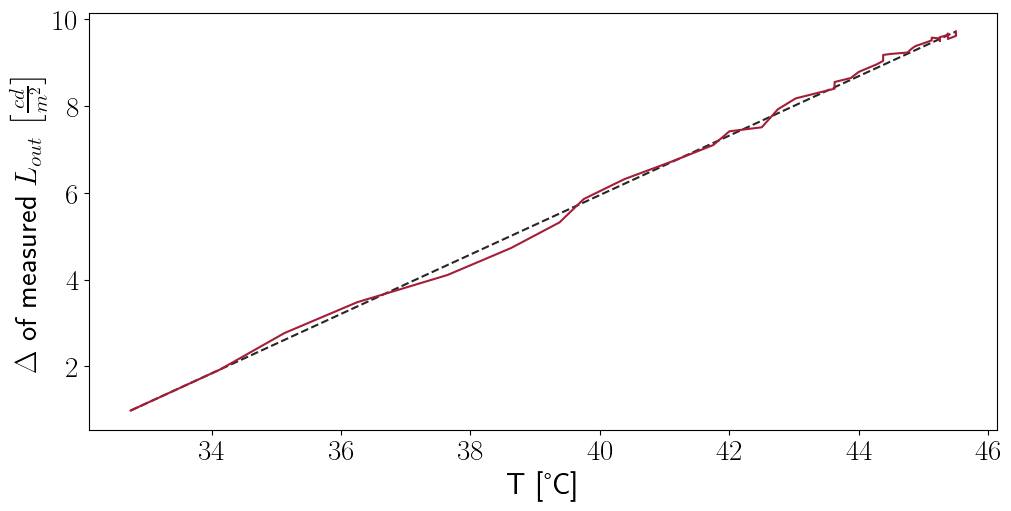

In [6]:
df_cold = mergedDataTemps[1].dataframe

max_diff = []
temp = []

for d in mergedDataTemps[2:]:
    df_warm = d.dataframe
    max_diff.append((df_cold["mean"]-df_warm["mean"]).max())
    temp.append((df_warm["temps"]).mean())

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5), layout='constrained')
fontsize=22
axes.plot([min(temp), max(temp)], [min(max_diff), max(max_diff)], color=Colormap.black,linestyle='--')
axes.plot(temp, max_diff, color=Colormap.map[0])

axes.set_xlabel(r'T [°C]', fontsize=fontsize)
axes.set_ylabel(r'$\Delta$ of measured $L_{out}$ $\left[\frac{cd}{m^2}\right]$', fontsize=fontsize) 
for tick in plt.gca().get_xticklabels():
    tick.set_fontsize(fontsize-1)
for tick in plt.gca().get_yticklabels():
    tick.set_fontsize(fontsize-1)

figurePath = f'{baseFigurePath}/03_04Monitor/DiffLoutTemp.png'
fig.show()
fig.savefig(figurePath, dpi=300)


## Figure 4.19

In [7]:
path = '../data/026tempDependency'
data = []

startingdate_str = '2023-11-17 18:19:46'
startingdate = datetime.strptime(startingdate_str, '%Y-%m-%d %H:%M:%S')
duration = 144 #sec
for i in range(1,51):
    data.append(XperimentPlotter.ReadData(f'{path}/Test{i:02}/', f'026 Test{i} (sc, ascending)', [(startingdate + timedelta(seconds=duration*i)).strftime('%Y-%m-%d %H:%M'), (startingdate + timedelta(seconds=duration*(i+1))).strftime('%Y-%m-%d %H:%M')]))

path_temps = f'{path}/Test50'
mergedDataTemps = []
for d in data:
    mergedDataTemps.append(XperimentPlotter.mergeTempsInData(d, path_temps))

/home/jonas/Documents/GithubRepo/code/./helper/Thermometer.py:33: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  traw = pd.read_csv(filename, header=None, sep=' ', skiprows=lambda i: 1 - i % 2, engine='c') # even lines from viewpixx
/home/jonas/Documents/GithubRepo/code/./helper/Thermometer.py:33: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  traw = pd.read_csv(filename, header=None, sep=' ', skiprows=lambda i: 1 - i % 2, engine='c') # even lines from viewpixx
/home/jonas/Documents/GithubRepo/code/./helper/Thermometer.py:33: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  traw = pd.read_csv(filename, header=None, sep=' ', skiprows=lambda i: 1 - i % 2, engine='c') # even lines from viewpixx
/home/jonas/Documents/GithubRepo/code/./helper/Thermometer.py:33: DtypeWarning: Columns (8) have mixed types. Specify dtype option on im

/tmp/ipykernel_141968/51196271.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


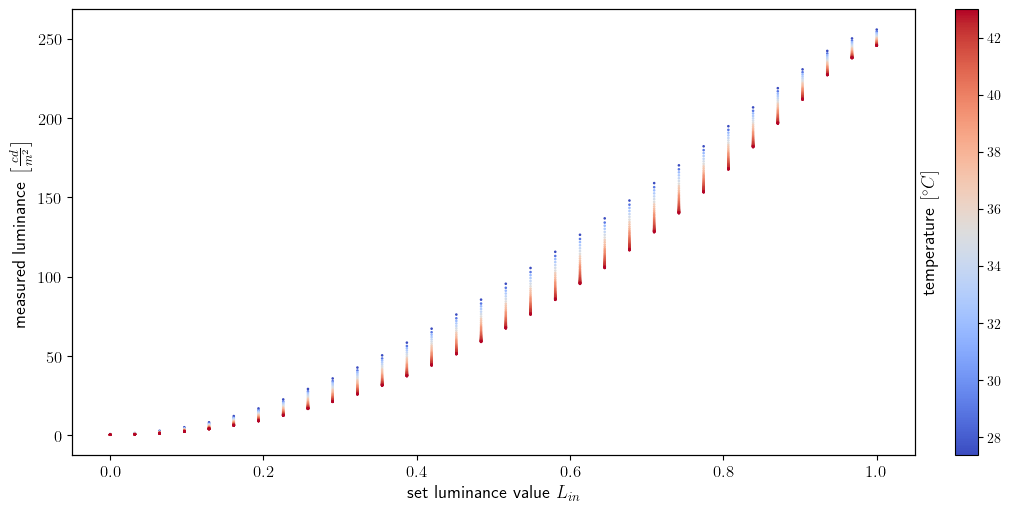

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5), layout='constrained')
fontsize = 13

list_dataframes = []
for d in mergedDataTemps:
    list_dataframes.append(d.dataframe)

concat = pd.concat(list_dataframes)

pcm = axes.scatter(concat['levels'], concat['mean'], marker='.', s=3, c=concat['temps'], cmap='coolwarm')

axes.set_xlabel('set luminance value $L_{in}$', fontsize=fontsize)
axes.set_ylabel(r'measured luminance $\left[\frac{cd}{m^2}\right]$', fontsize=fontsize)
for tick in plt.gca().get_xticklabels():
    tick.set_fontsize(fontsize-1)
for tick in plt.gca().get_yticklabels():
    tick.set_fontsize(fontsize-1)

# set label for colorbar
ax2 = axes.twinx()
ax2.set_yticks([])
ax2.set_ylabel(r'temperature $\left[^{\circ}C\right]$', fontsize=fontsize)

fig.colorbar(pcm, pad=0.02)

figurePath = f'{baseFigurePath}/03_04Monitor/profileVPIXX3DUnser.png'
fig.show()
fig.savefig(figurePath, dpi=300)